# 📌 k-Nearest Neighbors (k-NN)

---

## 🧠 Definition
k-NN is a **supervised, instance-based learning algorithm** that:
- Stores training data
- Predicts using nearest neighbors
- No explicit training phase

Also called:
- Lazy learner
- Instance-based learning

---

## 🎯 Core Idea
> “You are the average of your neighbors.”

Prediction logic:
- Find nearest K samples
- Use majority vote (classification)
- Use mean (regression)

---

## ⚙️ Working Steps

### Step 1 — Choose K
Number of neighbors to consider.

---

### Step 2 — Compute Distances
Common metrics:
- Euclidean (default)
- Manhattan
- Minkowski
- Cosine (rare)

---

### Step 3 — Sort by Distance
Pick K closest points.

---

### Step 4 — Voting
- Classification → Majority vote
- Regression → Mean value

---

## 🧪 Example
Features:
- CGPA
- IQ

Task:
Predict placement.

If K = 3:
- 2 neighbors placed
- 1 not placed

Prediction → Placed

---

## 🧬 Training vs Prediction

### Training Phase
Almost nothing:
- Just store data

### Prediction Phase
Heavy computation:
- Distance to all points
- Sorting
- Voting

This makes k-NN:
- Fast training
- Slow inference

---

## 📏 Importance of Feature Scaling

Distance depends on scale.

Example:
- Salary: 1–100000
- Age: 20–50

Salary dominates distance.

Solution:
✔ Standardization
✔ Normalization

---

## 🔧 Scaling Techniques

### StandardScaler
Mean = 0, Std = 1

### MinMaxScaler
Range = 0 to 1

---

## 🔍 Choosing Optimal K

### Rule of Thumb
```
K ≈ √N
```

Avoid even K for binary classification.

---

### Cross Validation Method (Best)
1. Train multiple models with different K
2. Evaluate accuracy
3. Pick best K

---

## 📊 Decision Boundary

Decision boundary = region separation.

Shows:
- Where class changes
- Model complexity

---

## 🔄 Effect of K on Boundaries

### Small K
- Very complex boundary
- Sensitive to noise
- High variance
- Overfitting

---

### Large K
- Smooth boundary
- Ignores patterns
- High bias
- Underfitting

---

## ⚖️ Bias-Variance Tradeoff

| K Value | Bias | Variance |
|--------|------|---------|
| Small | Low | High |
| Large | High | Low |

Goal:
Find balance.

---

## 🧪 Overfitting vs Underfitting

### Overfitting
- K = 1
- Memorizes data
- Jagged boundaries

### Underfitting
- K = N
- Always majority class
- No learning

---

## 🧰 Implementation (sklearn)

```python
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)
```

---

## 🔧 Important Hyperparameters

### n_neighbors
Number of neighbors.

---

### metric
Distance metric.

---

### weights
- uniform
- distance-weighted

Distance weighting often improves results.

---

## 📉 Complexity

### Training
O(1)

### Prediction
O(N × D)

N = samples  
D = dimensions

---

## ❌ Failure Cases

### 1️⃣ Large Datasets
Slow inference.

Example:
5 lakh rows → slow predictions

---

### 2️⃣ High Dimensional Data
Curse of dimensionality:
- Distances become unreliable
- All points seem equidistant

---

### 3️⃣ Sensitive to Outliers
Small K → outlier dominance

---

### 4️⃣ Feature Scale Issues
Different scales distort distance.

---

### 5️⃣ Imbalanced Data
Majority class bias.

---

### 6️⃣ No Interpretability
Black-box model:
- Cannot explain feature importance

---

## 🧠 Curse of Dimensionality

As dimensions increase:
- Distance differences shrink
- Neighbors lose meaning

This breaks k-NN.

---

## 🟢 Advantages

✔ Simple and intuitive  
✔ No training time  
✔ Works well for small datasets  
✔ Non-linear boundaries  
✔ Easy implementation  

---

## 🔴 Disadvantages

❌ Slow inference  
❌ Memory heavy  
❌ Sensitive to noise  
❌ Needs scaling  
❌ Poor interpretability  

---

## 📌 When to Use k-NN

- Small datasets
- Low dimensions
- Pattern recognition
- Recommendation systems
- Image similarity

---

## 🚫 When NOT to Use

- Real-time systems
- Large datasets
- High dimensional data
- Need interpretability

---

## 🎯 Real-World Applications

- Face recognition
- Document similarity
- Recommender systems
- Anomaly detection
- Medical diagnosis

---

## 🧠 Optimization Tricks

- KD-Trees
- Ball Trees
- Approximate NN (FAISS)
- Dimensionality reduction (PCA)

---

## 🧪 Variants

- Weighted k-NN
- Radius neighbors
- Approximate k-NN

---

## 🎤 Interview Questions

**Q: Why is k-NN lazy learner?**  
No training phase.

**Q: Why scaling required?**  
Distance sensitive.

**Q: Curse of dimensionality?**  
Distances lose meaning in high dimensions.

**Q: Training vs inference cost?**  
Training cheap, inference expensive.

**Q: Best K selection?**  
Cross-validation.

---

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('breast_cancer.csv')

In [6]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.shape

(569, 4)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:3], df.iloc[:,3:4],test_size=0.2, random_state=2)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=12)

In [16]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=12)

In [17]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9298245614035088

In [18]:
scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

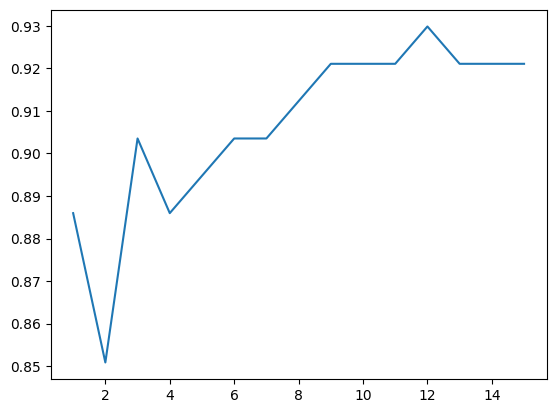

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)

# visualization

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed

def load_data():
    cancer = datasets.load_breast_cancer()
    return cancer

def plot_decision_boundaries(n_neighbors, data, labels):
    h = .02
    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(data, labels)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'2-Class classification (k = {n_neighbors})')
    plt.show()

cancer = load_data()

# Use only the first two features and standardize them.
X = StandardScaler().fit_transform(cancer.data[:, :2])
y = cancer.target

# Interactive widget
interact(plot_decision_boundaries, n_neighbors=(1, 20), data=fixed(X), labels=fixed(y));

interactive(children=(IntSlider(value=10, description='n_neighbors', max=20, min=1), Output()), _dom_classes=(…